# Evaluation

In [92]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import os

## Load test data

In [93]:
_, (test_images, test_labels) = datasets.cifar10.load_data()
test_images =  test_images / 255.0
test_labels = tf.keras.utils.to_categorical(test_labels)

## Load models

We are evaluating the following models:

1. Basic model with dropout
2. Batch normalisation
3. Increased dropout
4. Final model

In [94]:
models = {}

for model_name in os.listdir("../saved_model"):
    model_path = os.path.join("../saved_model", model_name)
    model = tf.keras.models.load_model(model_path)
    loss, acc = model.evaluate(test_images, test_labels)
    models[model_name] = {"loss": round(loss, 4), "acc": round(acc, 4)}

313/313 - 24s - loss: 1.5514 - accuracy: 0.7439 - 24s/epoch - 76ms/step
313/313 - 28s - loss: 0.9528 - accuracy: 0.8461 - 28s/epoch - 91ms/step
313/313 - 27s - loss: 0.3007 - accuracy: 0.9113 - 27s/epoch - 86ms/step
313/313 - 24s - loss: 0.2643 - accuracy: 0.9215 - 24s/epoch - 76ms/step
313/313 - 22s - loss: 1.2824 - accuracy: 0.7913 - 22s/epoch - 71ms/step
313/313 - 24s - loss: 0.8712 - accuracy: 0.8626 - 24s/epoch - 77ms/step
313/313 - 23s - loss: 0.8832 - accuracy: 0.7020 - 23s/epoch - 75ms/step


## Evaluate models

In [95]:
x_pos = [i for i, _ in enumerate(models)]

def create_figure():
    plt.style.use('ggplot')
    fig, ax = plt.subplots()
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models)
    ax.set_xlabel('Models')
    return fig, ax


### Loss

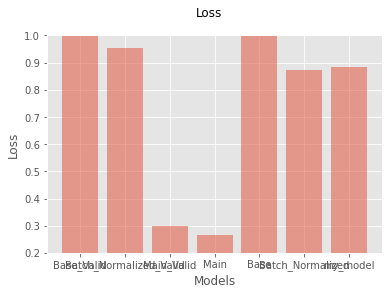

In [100]:
loss = [models[model]["loss"] for model in models]

fig, ax = create_figure()
fig.suptitle("Loss")
ax.bar(x_pos, loss, align='center', alpha=0.5)
ax.set_ylim(max(round(min(loss), 1) - 0.1, 0), 1)
ax.set_ylabel("Loss")

plt.savefig("loss.png")
plt.show()

### Accuracy

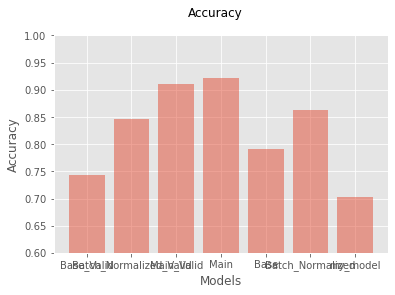

In [101]:
accuracy = [models[model]["acc"] for model in models]

fig, ax = create_figure()
ax.bar(x_pos, accuracy, align='center', alpha=0.5)
ax.set_ylim(round(min(accuracy), 1) - 0.1, 1)
ax.set_ylabel("Accuracy")
fig.suptitle("Accuracy")

plt.savefig("accuracy.png")
plt.show()

In [102]:
for name, model in models.items():
    print(f"{name}: loss: {model['loss']}, acc: {model['acc']}")

Base_Valid: loss: 1.5514, acc: 0.7439
Batch_Normalized_Valid: loss: 0.9528, acc: 0.8461
Main_Valid: loss: 0.3007, acc: 0.9113
Main: loss: 0.2643, acc: 0.9215
Base: loss: 1.2824, acc: 0.7913
Batch_Normalized: loss: 0.8712, acc: 0.8626
my_model: loss: 0.8832, acc: 0.702
